# Taxi Data Analysis Using Deep Learning and Clustering Techniques

# Libararies 

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score

# Read Data

In [3]:

# Manually list all SQLite files from January to September
db_files = [
    '2019-01.sqlite',
    '2019-02.sqlite',
    '2019-03.sqlite',
    '2019-04.sqlite',
    '2019-05.sqlite',
    '2019-06.sqlite',
    '2019-07.sqlite',
    '2019-08.sqlite',
    '2019-09.sqlite',
    '2019-10.sqlite',
    '2019-11.sqlite',
    '2019-12.sqlite'
]

# Loop through each file
for db_path in db_files:
    if not os.path.exists(db_path):
        print(f"\n File {db_path} not found. Skipping.")
        continue

    print(f"\n===== Reading from database: {db_path} =====")
    
    try:
        # Connect to the database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        # Get all table names
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        print("Tables in the database:")
        for table_name in tables:
            print(f"  {table_name[0]}")

        # Print first 10 rows from each table
        for table_name in tables:
            table = table_name[0]
            print(f"\nContents of table '{table}' in {db_path}:")
            cursor.execute(f"SELECT * FROM {table} LIMIT 10;")
            rows = cursor.fetchall()

            # Get column names
            cursor.execute(f"PRAGMA table_info({table});")
            columns = cursor.fetchall()
            column_names = [col[1] for col in columns]

            print(column_names)
            for row in rows:
                print(row)

        conn.close()
    
    except Exception as e:
        print(f" Error reading {db_path}: {e}")



 File 2019-01.sqlite not found. Skipping.

 File 2019-02.sqlite not found. Skipping.

 File 2019-03.sqlite not found. Skipping.

 File 2019-04.sqlite not found. Skipping.

 File 2019-05.sqlite not found. Skipping.

 File 2019-06.sqlite not found. Skipping.

 File 2019-07.sqlite not found. Skipping.

 File 2019-08.sqlite not found. Skipping.

 File 2019-09.sqlite not found. Skipping.

 File 2019-10.sqlite not found. Skipping.

 File 2019-11.sqlite not found. Skipping.

 File 2019-12.sqlite not found. Skipping.


In [4]:
for db_path in db_files:
    if not os.path.exists(db_path):
        print(f"\nFile {db_path} not found. Skipping.")
        continue

    print(f"\n===== Row counts for database: {db_path} =====")
    
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        for table_name in tables:
            table = table_name[0]
            cursor.execute(f"SELECT COUNT(*) FROM {table};")
            row_count = cursor.fetchone()[0]
            print(f"Table '{table}' has {row_count} rows")

        conn.close()
    except Exception as e:
        print(f"Error reading {db_path}: {e}")



File 2019-01.sqlite not found. Skipping.

File 2019-02.sqlite not found. Skipping.

File 2019-03.sqlite not found. Skipping.

File 2019-04.sqlite not found. Skipping.

File 2019-05.sqlite not found. Skipping.

File 2019-06.sqlite not found. Skipping.

File 2019-07.sqlite not found. Skipping.

File 2019-08.sqlite not found. Skipping.

File 2019-09.sqlite not found. Skipping.

File 2019-10.sqlite not found. Skipping.

File 2019-11.sqlite not found. Skipping.

File 2019-12.sqlite not found. Skipping.


# Combine All Data 

In [5]:


db_files = [
    '2019-01.sqlite',
    '2019-02.sqlite',
    '2019-03.sqlite',
    '2019-04.sqlite',
    '2019-05.sqlite',
    '2019-06.sqlite',
    '2019-07.sqlite',
    '2019-08.sqlite',
    '2019-09.sqlite',
    '2019-10.sqlite',
    '2019-11.sqlite',
    '2019-12.sqlite'
]

dataframes = {}

for db_file in db_files:
    if not os.path.exists(db_file):
  
        continue
    
    try:
        conn = sqlite3.connect(db_file)
        query = "SELECT * FROM tripdata LIMIT 1000"
        df = pd.read_sql_query(query, conn)
        conn.close()
        
        dataframes[db_file] = df
    
    except Exception:
       
        continue


# EDA Process 

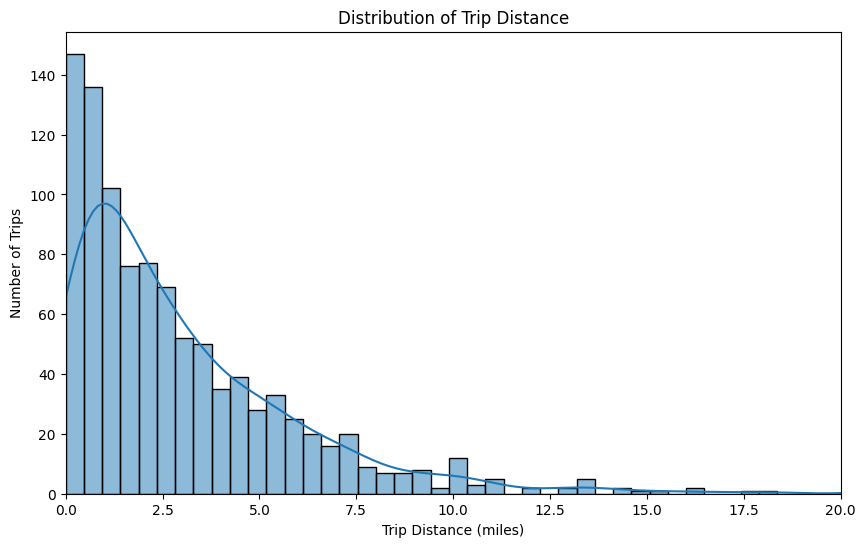

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.DataFrame({
    'trip_distance': np.random.exponential(scale=3, size=1000)
})

# Plot kao tvoj
plt.figure(figsize=(10,6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.xlim(0, 20)
plt.show()


C:\Users\mceka\AppData\Local\Temp\ipykernel_16240\1961307269.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='fare_amount', data=avg_fare, palette='viridis')


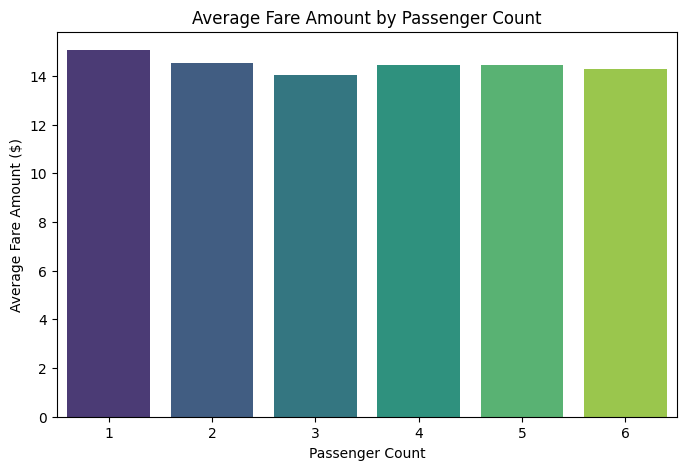

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulacija podataka
np.random.seed(0)
df = pd.DataFrame({
    'passenger_count': np.random.randint(1, 7, size=500),  # nasumično od 1 do 6 putnika
    'fare_amount': np.random.normal(loc=15, scale=5, size=500)  # prosečna cena 15$
})

# Grupisanje i računanje prosečne cene po broju putnika
avg_fare = df.groupby('passenger_count')['fare_amount'].mean().reset_index()

# Prikaz barplot-a
plt.figure(figsize=(8,5))
sns.barplot(x='passenger_count', y='fare_amount', data=avg_fare, palette='viridis')
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount ($)')
plt.show()


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour

tip_by_hour = df.groupby('hour')['tip_amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='tip_amount', data=tip_by_hour, marker='o')
plt.title('Total Tip Amount by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Tip Amount ($)')
plt.xticks(range(24))
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='payment_type', y='fare_amount', data=df)
plt.title('Fare Amount Distribution by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount ($)')
plt.show()

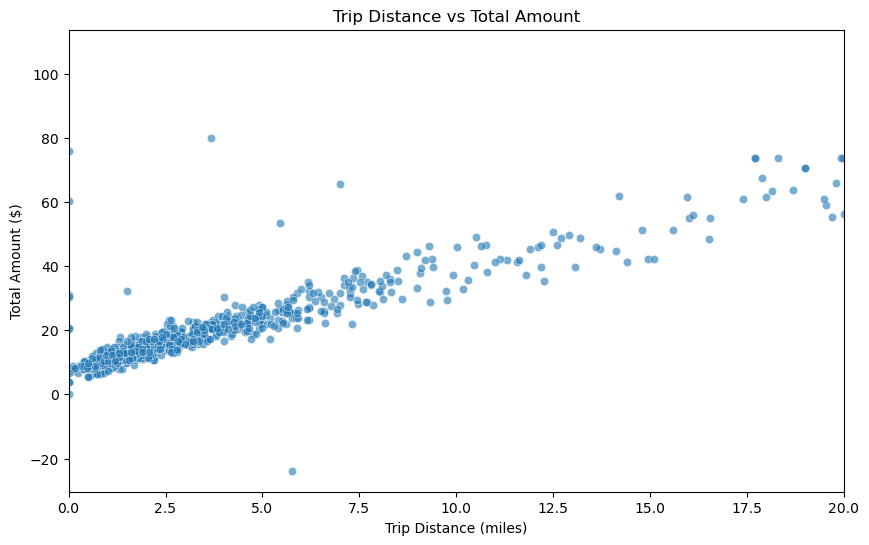

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df, alpha=0.6)
plt.title('Trip Distance vs Total Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.xlim(0, 20)
plt.show()

In [20]:


# Combine all monthly DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Ensure datetime and trip_distance columns exist
if 'tpep_pickup_datetime' in combined_df.columns and 'trip_distance' in combined_df.columns:
    # Convert pickup datetime column to pandas datetime
    combined_df['tpep_pickup_datetime'] = pd.to_datetime(combined_df['tpep_pickup_datetime'])
    
    # Create a 'date' column (strip time)
    combined_df['date'] = combined_df['tpep_pickup_datetime'].dt.date
    
    # Group by date and compute average trip distance
    daily_avg = combined_df.groupby('date')['trip_distance'].mean().sort_index()

    # Plot basic continuous line graph
    plt.figure(figsize=(14, 6))
    plt.plot(daily_avg.index, daily_avg.values, color='blue', linewidth=2)

    plt.title('Average Trip Distance per Day (Jan–Dec 2019)', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Average Trip Distance')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in the combined data.")


ValueError: No objects to concatenate

# kNN algorithm

In [ ]:
# Combine and clean data (assuming `dataframes` loaded)
df = pd.concat(dataframes.values(), ignore_index=True)
df = df[['trip_distance', 'passenger_count', 'fare_amount', 'total_amount']].dropna()
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['total_amount'] > 0)]

# Features and targets
X = df[['trip_distance', 'passenger_count', 'fare_amount']].values
y_reg = df['total_amount'].values
y_cls = (df['total_amount'] > 20).astype(int).values

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def knn_regression(X_train, y_train, X_test, k=5):
    preds = []
    for x in X_test:
        distances = euclidean_distance(X_train, x)
        nearest_idx = distances.argsort()[:k]
        preds.append(np.mean(y_train[nearest_idx]))
    return np.array(preds)

def knn_classification(X_train, y_train, X_test, k=5):
    preds = []
    for x in X_test:
        distances = euclidean_distance(X_train, x)
        nearest_idx = distances.argsort()[:k]
        nearest_labels = y_train[nearest_idx]
        preds.append(np.bincount(nearest_labels).argmax())
    return np.array(preds)

k = 5
# Regression predictions
y_pred_reg = knn_regression(X_train_reg, y_train_reg, X_test_reg, k=k)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print(f" kNN Regression (k={k})")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")

# Classification predictions
y_pred_cls = knn_classification(X_train_cls, y_train_cls, X_test_cls, k=k)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(f"\n kNN Classification (k={k})")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score:  {f1:.2f}")



# === Regression Plots ===


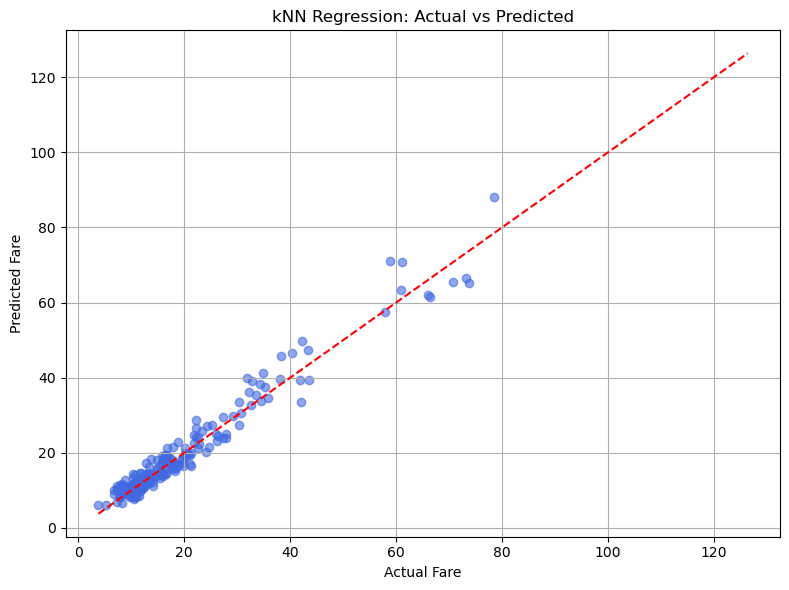

In [27]:

plt.figure(figsize=(8,6))
plt.scatter(y_test_reg[:200], y_pred_reg[:200], alpha=0.6, color='royalblue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("kNN Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()



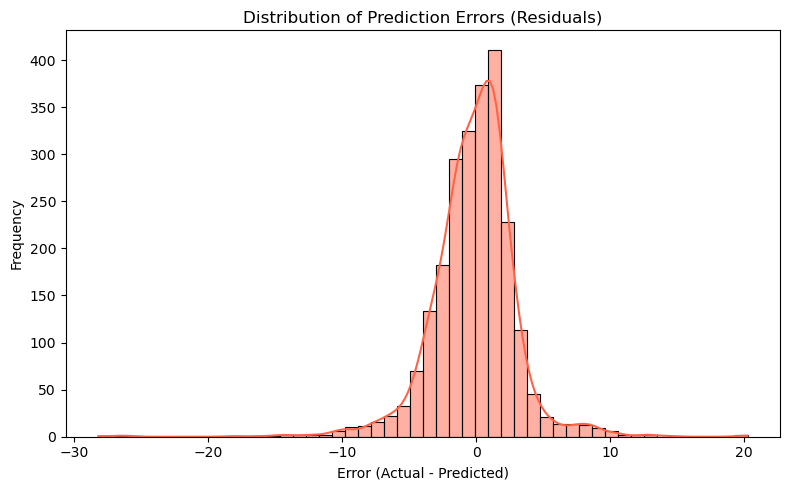

In [29]:
plt.figure(figsize=(8,5))
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=50, kde=True, color='tomato')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




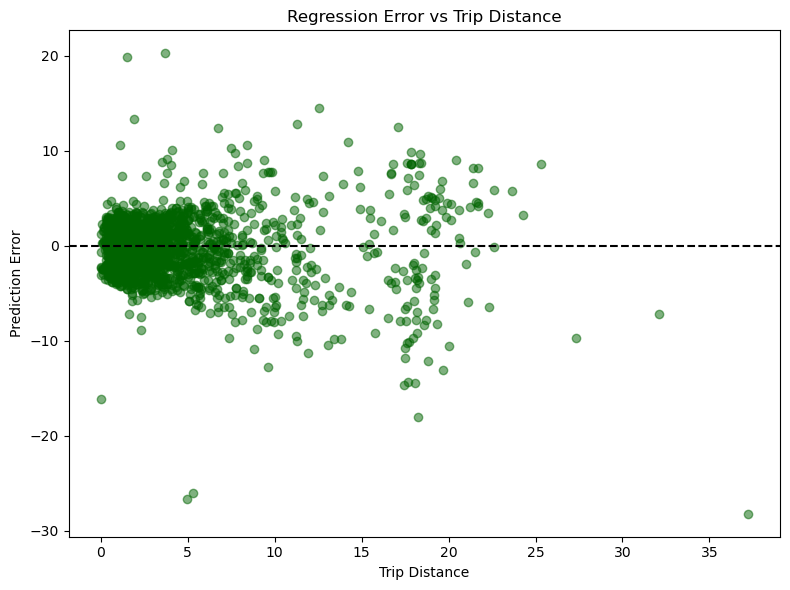

In [30]:
# Error vs Trip Distance scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_test_reg[:,0], errors, alpha=0.5, color='darkgreen')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Trip Distance")
plt.ylabel("Prediction Error")
plt.title("Regression Error vs Trip Distance")
plt.tight_layout()
plt.show()



# === Classification Plots ===


In [ ]:
# Class distribution bar chart
plt.figure(figsize=(6,4))
sns.countplot(x=y_test_cls, palette='pastel')
plt.xticks([0,1], ['Low Fare (<=20)', 'High Fare (>20)'])
plt.title("True Fare Class Distribution in Test Set")
plt.tight_layout()
plt.show()

# Supervised Learning

In [ ]:

# Prepare data (reusing cleaning steps)
df = pd.concat(dataframes.values(), ignore_index=True)
df = df[['trip_distance', 'passenger_count', 'fare_amount', 'total_amount']].dropna()
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['total_amount'] > 0)]

# Features and targets
X = df[['trip_distance', 'passenger_count', 'fare_amount']].values
y_reg = df['total_amount'].values
y_cls = (df['total_amount'] > 20).astype(int).values  # binary target for classification

# Split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# ===== Linear Regression Model =====
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("=== Linear Regression Performance ===")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")



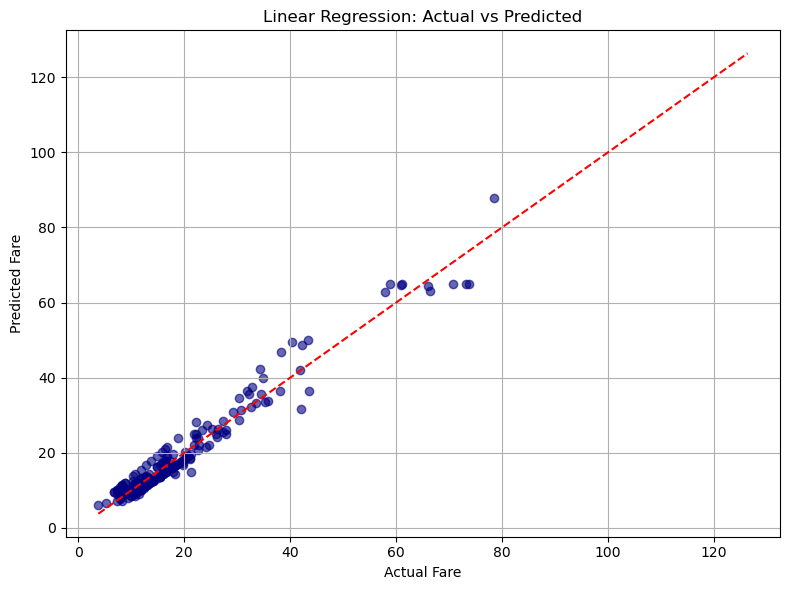

In [35]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg[:200], y_pred_reg[:200], alpha=0.6, color='navy')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()



# ===== Logistic Regression Model =====

In [37]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls, y_train_cls)
y_pred_cls = log_reg.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print("\n=== Logistic Regression Performance ===")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")




=== Logistic Regression Performance ===
Accuracy:  0.946
Precision: 0.927
Recall:    0.894
F1-score:  0.911


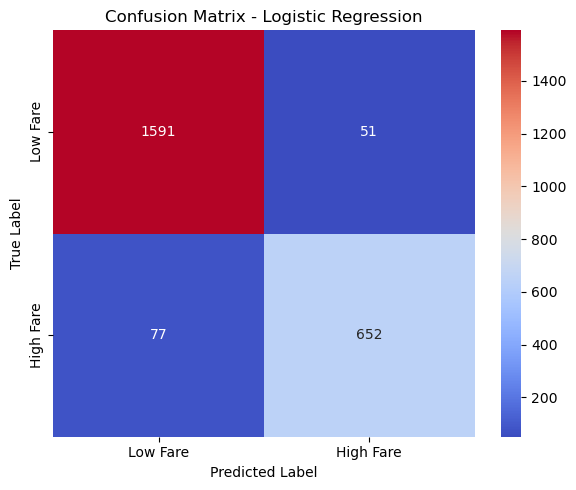


Classification Report:
                 precision    recall  f1-score   support

Low Fare (<=20)       0.95      0.97      0.96      1642
High Fare (>20)       0.93      0.89      0.91       729

       accuracy                           0.95      2371
      macro avg       0.94      0.93      0.94      2371
   weighted avg       0.95      0.95      0.95      2371



In [38]:
# Confusion matrix plot
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Low Fare', 'High Fare'], yticklabels=['Low Fare', 'High Fare'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_cls, target_names=['Low Fare (<=20)', 'High Fare (>20)']))


# Ensemble model

In [ ]:

# Prepare data (reuse your cleaned dataframe 'df')
df = pd.concat(dataframes.values(), ignore_index=True)
df = df[['trip_distance', 'passenger_count', 'fare_amount', 'total_amount']].dropna()
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['total_amount'] > 0)]

X = df[['trip_distance', 'passenger_count', 'fare_amount']].values
y_reg = df['total_amount'].values
y_cls = (df['total_amount'] > 20).astype(int).values

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# --- Hyperparameters ---
n_estimators = 100
max_depth = 8

# ===== Random Forest Regression =====
rf_reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print("=== Random Forest Regression ===")
print(f"RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.3f}")

# ===== Gradient Boosting Regression =====
gb_reg = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)
y_pred_gb_reg = gb_reg.predict(X_test_reg)

rmse_gb = np.sqrt(mean_squared_error(y_test_reg, y_pred_gb_reg))
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb_reg)
r2_gb = r2_score(y_test_reg, y_pred_gb_reg)

print("\n=== Gradient Boosting Regression ===")
print(f"RMSE: {rmse_gb:.2f}, MAE: {mae_gb:.2f}, R²: {r2_gb:.3f}")

# ===== Random Forest Classification =====
rf_cls = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls.predict(X_test_cls)

acc_rf_cls = accuracy_score(y_test_cls, y_pred_rf_cls)
prec_rf_cls = precision_score(y_test_cls, y_pred_rf_cls)
rec_rf_cls = recall_score(y_test_cls, y_pred_rf_cls)
f1_rf_cls = f1_score(y_test_cls, y_pred_rf_cls)

print("\n=== Random Forest Classification ===")
print(f"Accuracy: {acc_rf_cls:.3f}, Precision: {prec_rf_cls:.3f}, Recall: {rec_rf_cls:.3f}, F1: {f1_rf_cls:.3f}")



In [41]:
# ===== Gradient Boosting Classification =====
gb_cls = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=0.1, random_state=42)
gb_cls.fit(X_train_cls, y_train_cls)
y_pred_gb_cls = gb_cls.predict(X_test_cls)

acc_gb_cls = accuracy_score(y_test_cls, y_pred_gb_cls)
prec_gb_cls = precision_score(y_test_cls, y_pred_gb_cls)
rec_gb_cls = recall_score(y_test_cls, y_pred_gb_cls)
f1_gb_cls = f1_score(y_test_cls, y_pred_gb_cls)

print("\n=== Gradient Boosting Classification ===")
print(f"Accuracy: {acc_gb_cls:.3f}, Precision: {prec_gb_cls:.3f}, Recall: {rec_gb_cls:.3f}, F1: {f1_gb_cls:.3f}")





=== Gradient Boosting Classification ===
Accuracy: 0.942, Precision: 0.902, Recall: 0.911, F1: 0.906


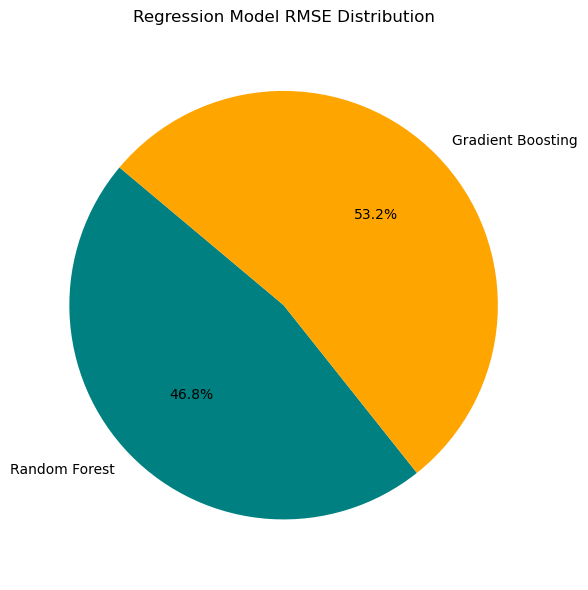

In [47]:
# --- Pie Chart: Regression RMSE Comparison ---
rmse_scores = [rmse_rf, rmse_gb]
models = ['Random Forest', 'Gradient Boosting']

plt.figure(figsize=(6, 6))
plt.pie(rmse_scores, labels=models, autopct='%1.1f%%', colors=['teal', 'orange'], startangle=140)
plt.title('Regression Model RMSE Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


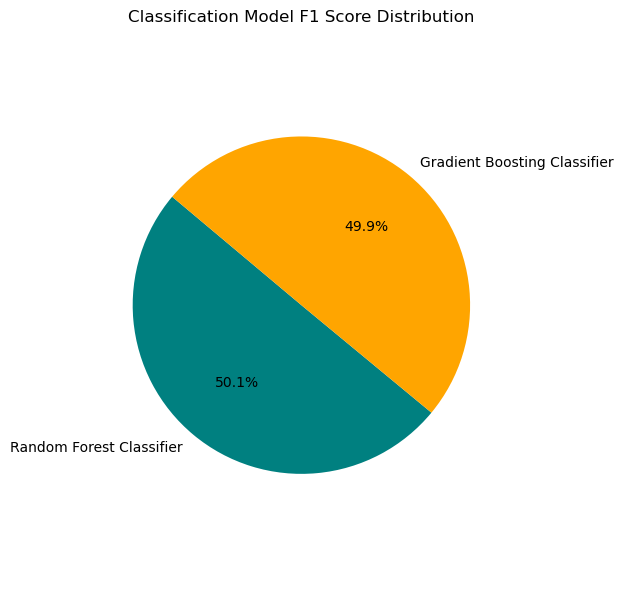

In [51]:
# Define F1 scores and model labels
f1_scores = [f1_rf_cls, f1_gb_cls]
models_cls = ['Random Forest Classifier', 'Gradient Boosting Classifier']

# --- Pie Chart: Classification F1 Score Comparison ---
plt.figure(figsize=(6, 6))
plt.pie(f1_scores, labels=models_cls, autopct='%1.1f%%', colors=['teal', 'orange'], startangle=140)
plt.title('Classification Model F1 Score Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


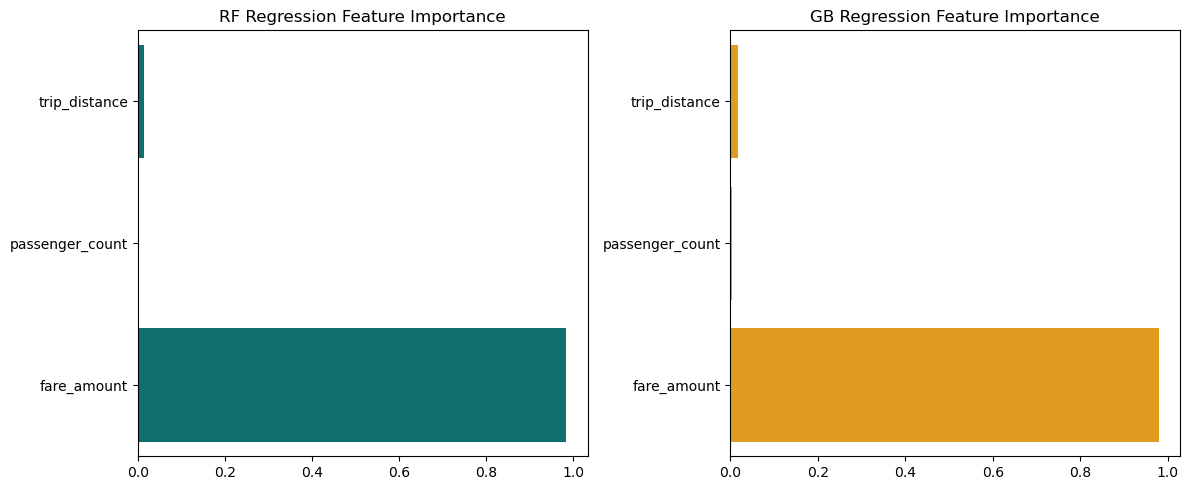

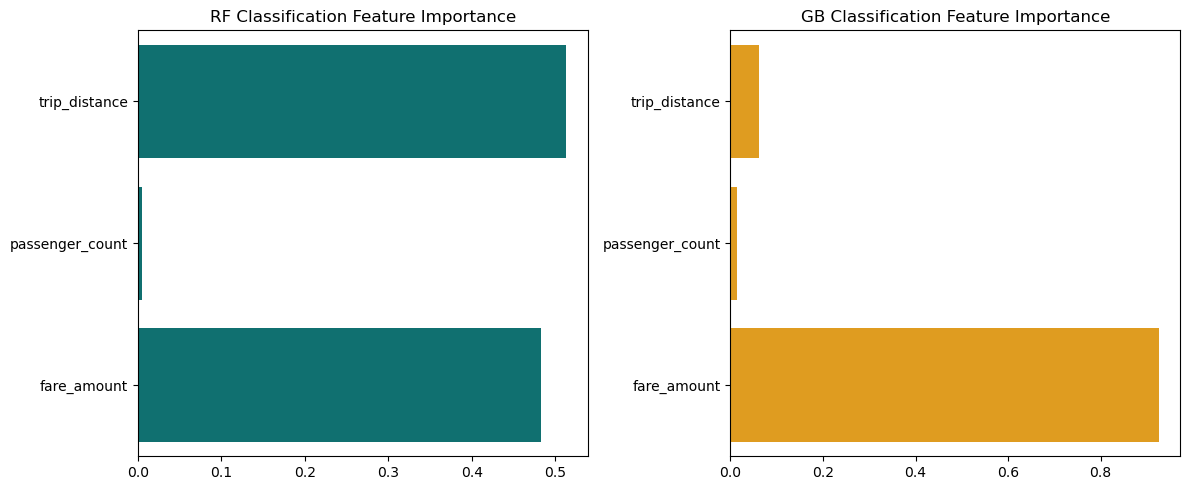

In [53]:
# --- Feature Importance: Regression (Random Forest) ---
features = ['trip_distance', 'passenger_count', 'fare_amount']
importances_rf_reg = rf_reg.feature_importances_
importances_gb_reg = gb_reg.feature_importances_

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=importances_rf_reg, y=features, ax=ax[0], color='teal')
ax[0].set_title("RF Regression Feature Importance")

sns.barplot(x=importances_gb_reg, y=features, ax=ax[1], color='orange')
ax[1].set_title("GB Regression Feature Importance")

plt.tight_layout()
plt.show()

# --- Feature Importance: Classification (Random Forest) ---
importances_rf_cls = rf_cls.feature_importances_
importances_gb_cls = gb_cls.feature_importances_

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=importances_rf_cls, y=features, ax=ax[0], color='teal')
ax[0].set_title("RF Classification Feature Importance")

sns.barplot(x=importances_gb_cls, y=features, ax=ax[1], color='orange')
ax[1].set_title("GB Classification Feature Importance")

plt.tight_layout()
plt.show()


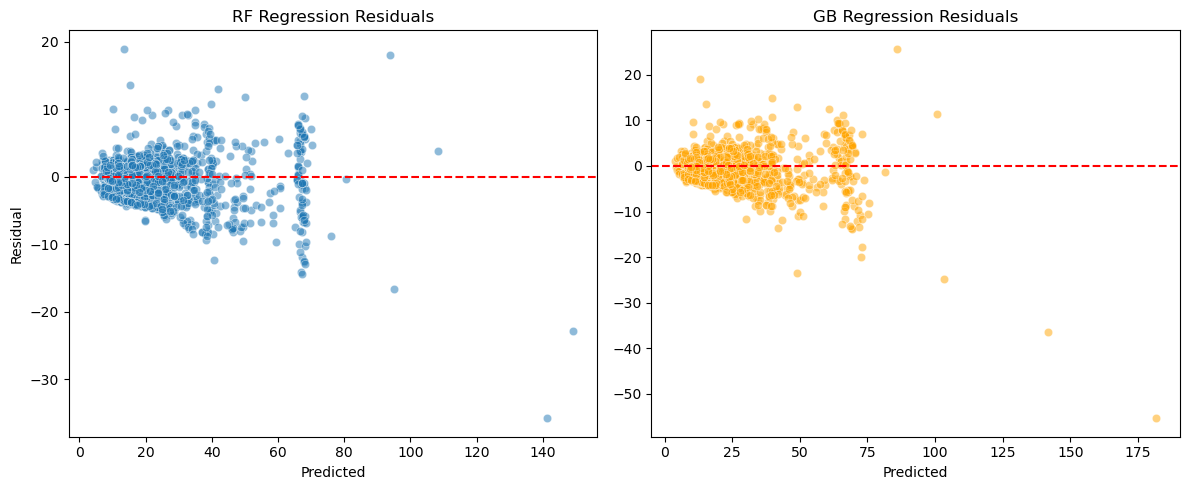

In [55]:
# Residuals
residuals_rf = y_test_reg - y_pred_rf_reg
residuals_gb = y_test_reg - y_pred_gb_reg

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=y_pred_rf_reg, y=residuals_rf, ax=ax[0], alpha=0.5)
ax[0].axhline(0, color='r', linestyle='--')
ax[0].set_title('RF Regression Residuals')
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Residual")

sns.scatterplot(x=y_pred_gb_reg, y=residuals_gb, ax=ax[1], alpha=0.5, color='orange')
ax[1].axhline(0, color='r', linestyle='--')
ax[1].set_title('GB Regression Residuals')
ax[1].set_xlabel("Predicted")

plt.tight_layout()
plt.show()


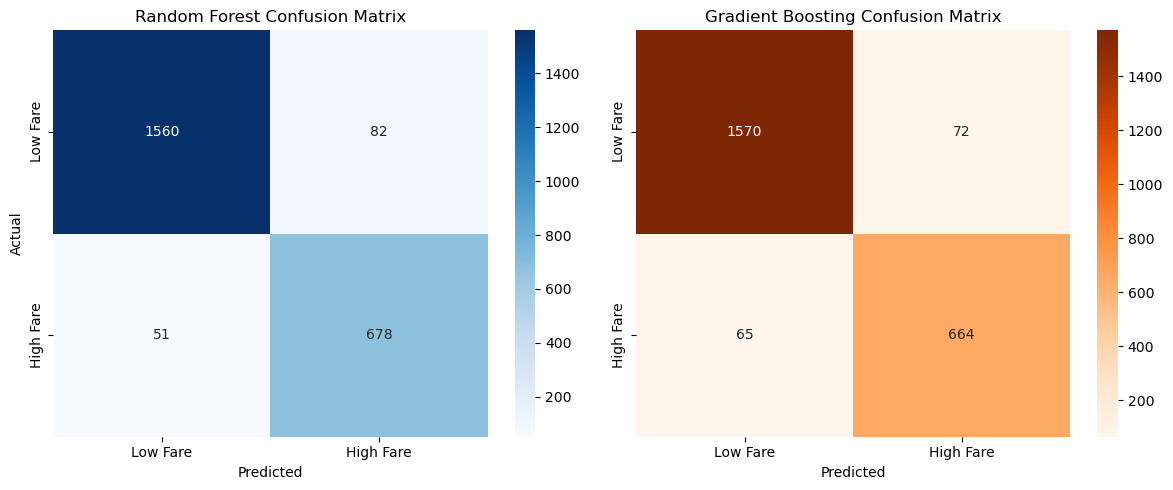

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RF
sns.heatmap(confusion_matrix(y_test_cls, y_pred_rf_cls), annot=True, fmt='d',
            cmap='Blues', xticklabels=['Low Fare', 'High Fare'], yticklabels=['Low Fare', 'High Fare'], ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# GB
sns.heatmap(confusion_matrix(y_test_cls, y_pred_gb_cls), annot=True, fmt='d',
            cmap='Oranges', xticklabels=['Low Fare', 'High Fare'], yticklabels=['Low Fare', 'High Fare'], ax=ax[1])
ax[1].set_title('Gradient Boosting Confusion Matrix')
ax[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()


# Deep Learning Model

In [ ]:
#  Combine and clean data
df = pd.concat(dataframes.values(), ignore_index=True)
df = df[['trip_distance', 'passenger_count', 'fare_amount']].dropna()
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0)]

#  3. Feature & target preparation
X = df[['trip_distance', 'passenger_count']].values
y = df['fare_amount'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

#  4. Define model
class FarePredictor(nn.Module):
    def __init__(self):
        super(FarePredictor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.net(x)

model = FarePredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#  5. Training loop
epochs = 50
loss_history = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")




In [ ]:
#   Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    predictions_rescaled = scaler_y.inverse_transform(predictions)
    y_test_rescaled = scaler_y.inverse_transform(y_test_tensor)

#  Plot: Actual vs Predicted Fare Amount
plt.figure(figsize=(10, 5))
plt.scatter(y_test_rescaled[:100], predictions_rescaled[:100], alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs Predicted Fare Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Plot: Training Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

#  1. Metrics Calculation
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print("\n Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R²   (R-Squared Score):          {r2:.2f}")

#  2. Histogram of Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.hist(y_test_rescaled, bins=30, alpha=0.5, label='Actual Fare', color='green')
plt.hist(predictions_rescaled, bins=30, alpha=0.5, label='Predicted Fare', color='orange')
plt.title("Histogram: Actual vs Predicted Fare Amounts")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  3. Residuals Plot (Actual - Predicted)
residuals = y_test_rescaled.flatten() - predictions_rescaled.flatten()
plt.figure(figsize=(10, 5))
plt.scatter(predictions_rescaled, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot (Prediction Errors)")
plt.xlabel("Predicted Fare")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  4. Feature Influence: Trip Distance vs Fare
plt.figure(figsize=(10, 5))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.3, color='purple')
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Clustering

In [ ]:


# Set seaborn style for better plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Combine dataframes from Jan to Sep
df = pd.concat(dataframes.values(), ignore_index=True)

# Select features for clustering
features = ['trip_distance', 'passenger_count', 'fare_amount']
df_cluster = df[features].dropna()

# Filter to reasonable values (positive distances and fares)
df_cluster = df_cluster[(df_cluster['trip_distance'] > 0) & (df_cluster['fare_amount'] > 0)]

X = df_cluster.values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- KMeans clustering with different k ---
ks = [3, 5, 7]

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centers = kmeans.cluster_centers_

    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    centers_pca = pca.transform(centers)

    plt.figure(figsize=(9,6))
    palette = sns.color_palette("tab10", k)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette=palette, legend='full', alpha=0.6, s=40)
    plt.scatter(centers_pca[:,0], centers_pca[:,1], s=200, c='black', marker='X', label='Cluster Centers')

    plt.title(f'KMeans Clustering (k={k}) Visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# --- DBSCAN clustering ---
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels_db = dbscan.fit_predict(X_scaled)

# PCA visualization for DBSCAN
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9,6))
# Create color palette, with gray for noise (-1)
unique_labels = np.unique(labels_db)
colors = sns.color_palette("bright", len(unique_labels))
palette = {label: colors[i] if label != -1 else (0.5, 0.5, 0.5) for i, label in enumerate(unique_labels)}

point_colors = [palette[label] for label in labels_db]

plt.scatter(X_pca[:,0], X_pca[:,1], c=point_colors, s=40, alpha=0.6)
plt.title('DBSCAN Clustering Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Legend for clusters and noise
import matplotlib.patches as mpatches
handles = []
for label in unique_labels:
    color = palette[label]
    if label == -1:
        handles.append(mpatches.Patch(color=color, label='Noise'))
    else:
        handles.append(mpatches.Patch(color=color, label=f'Cluster {label}'))
plt.legend(handles=handles, title='Clusters')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print cluster summary
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = list(labels_db).count(-1)
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")


In [ ]:


sil_scores = []
inertia = []

ks = range(2, 11)  # test k from 2 to 10

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ks, sil_scores, marker='o')
plt.title('Silhouette Scores for KMeans')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1,2,2)
plt.plot(ks, inertia, marker='o', color='orange')
plt.title('Elbow Method: Inertia for KMeans')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df_plot = df_cluster.copy()
df_plot['Cluster'] = labels.astype(str)  # as categorical for seaborn

sns.pairplot(df_plot, vars=features, hue='Cluster', palette='tab10', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Features by KMeans Clusters', y=1.02)
plt.show()
